# Real Estate ML Project

**This JN goes through an entire workflow of a standard ML project using a simplified version of the "California Housing Dataset".**

To start, we will download the data. This can be done by simply downloading the .csv file directly from the website, but in practice **it is much more useful to create a function to download the data**. 

This is so that if the data gets updated, we won't need to manually download it ourselves again - we simply call this function and it does it for us. This is beneficial if you are expecting to update your model with each new release of the data set periodically (you can write a script for that!).

Moreover, if you need to install the data set on multiple machines, using a function to automate the process is useful to keep the process consistent for all machines and users.

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATASET_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

LOCAL_FOLDER_PATH = os.path.join("datasets", "housing") # Create this directory to store ALL downloaded data sets
FILE_NAME = "housing" # Can specify name for downloaded and saved file

def fetch_housing_data(dataset_url = DATASET_URL, housing_path = LOCAL_FOLDER_PATH):
    '''Downloads the data set from given URL; Creates a local folder to save in; Extracts data'''
    
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, FILE_NAME+".tgz") # Can specify file extension if not .tgz
    urllib.request.urlretrieve(url = dataset_url, filename = tgz_path)
    
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path) # Can specify path where you wish to extract the data; Default is home directory
    housing_tgz.close()

In [2]:
fetch_housing_data()

Next, we load the data from the 'housing.csv' file into this JN. As usual, we create a function to do this for us.

In [3]:
import pandas as pd

def load_housing_data(data_path = LOCAL_FOLDER_PATH):
    csv_path = os.path.join(data_path, FILE_NAME+".csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

Now that we have the data loaded into this JN, we can have an initial look at the data. Currently, this data is stored in a pandas dataframe, and pandas provides a variety of methods on dataframes we can use.

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can also use Matplotlib to visualize our data with various types of charts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018117AC4760>,
      dtype=object)

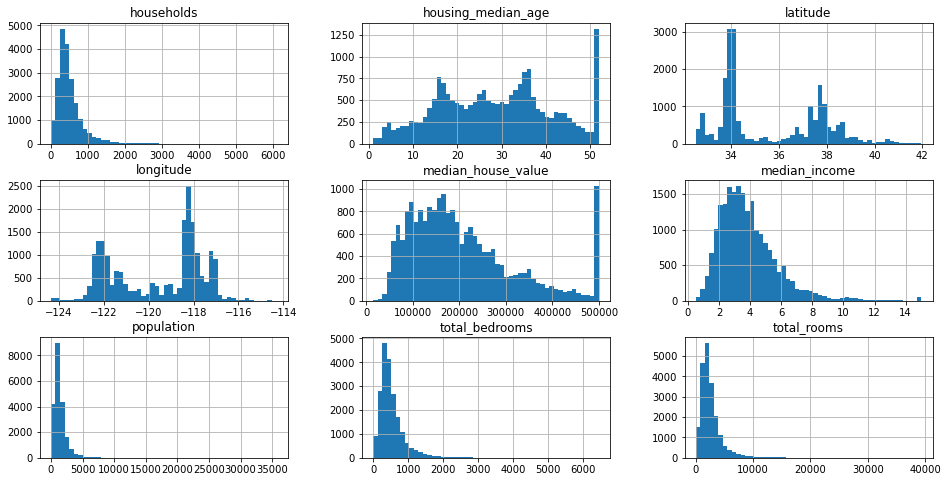

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=50, figsize=(16,8))

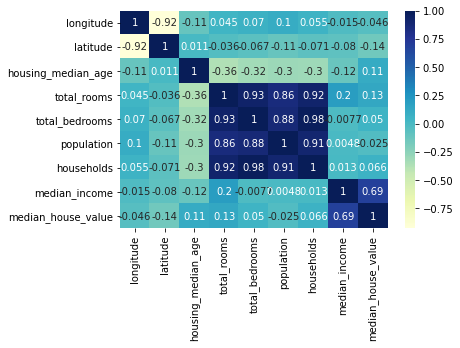

In [11]:
import seaborn as sns

sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)

# Possible problem: the data is not scaled, so the values shown in the heatmap are not truly representative

Once we are satisfied with our investigation of the data, the next thing we should do is immediately split the data into a training set and test set. 

It may seem premature to split the data this early, but the human brain is very good at pattern detection. As such, you may unknowingly "discover" some pattern in the test set that may bias your choice of ML algorithm which would cause your generalization error to be too optimistic. You may then launch your ML model but it will not perform sufficiently well. This idea is called "data snooping" bias.

There are a few immediate methods to split the data into training and test sets:

1. Select instances randomly and use 20% (or less) to create the test set
2. Split the data only once, and save the training and test sets as separate files
3. Use a random number generator to always use the same 'seed' when splitting the data (in step 1)

Unfortunately, each of the above methods have their respective issues:

1. If you run your entire ML program again, the test set will have different instances in it! Every run of our program will then cause our (already made) ML model to get a 'sneak peak' at data it has never see before. With enough re-runs of our program, the ML model will eventually see a large majority of the data, so any "new" test set will not be a good indicator of the model's performance.

2. This would work well if this data set was unchanging. But it may be the case that the data set will be updated with new data in the future. Hence, when you try to split the data again (as in step 2), the test set may disclude any instances from the old data it had before (i.e. old data from the training and test sets may get swapped).

3. The same issue will still occur even when using a new seed.

Here is a solution that will always allow for a stable and consistent train/test split even when the data set is updated with new data: **We use a unique identifier for each instance to dictate whether that instance is allocated to the training or test set**.

As an example, one could compute the hash of an instances unique identifier and based on the output make a decision rule as to which set to allocate that instance to. Then, even if you procure new data, the old data will still have the same allocation!

It is possible though that a data set may not come with a "unique identifier" column. In this case, we could try to identify the most stable features of the data set and create our own unique identifier for the data set.

Finally, even if this is not possible, you can still use the row indices as your unique identifiers. In this case, you must ensure that any new data gets **appended** to the end of the data set **and** that old data does not get deleted.

Here is an implementation of this idea:

In [12]:
from zlib import crc32
import numpy as np

def test_set_decision(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_data_by_identifier(data, test_ratio, identifier_column):
    '''identifier column must be a <str>
    Output: (training_set, test_set)'''
    
    ids = data[identifier_column]
    in_test_set = ids.apply(lambda id_: test_set_decision(id_, test_ratio))
    print(in_test_set)
    print(data.loc[~in_test_set])
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
training_set, test_set = split_data_by_identifier(housing_with_id, 0.2, "index")

0        False
1        False
2         True
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: index, Length: 20640, dtype: bool
       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
6          6    -122.25     37.84                52.0       2535.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24  

In [15]:
training_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


Here is an example of creating our own unique identifier. Since the location data is consistent and stable, we can use the longitude and latitude values to create a column of values for the unique identifier. Note that the training and test sets (printed below) created this way are different when using the row index as the unique identifier!

In [17]:
housing_with_id["manual_id"] = housing["longitude"]*1000 + housing["latitude"]

In [18]:
training_set2, test_set2 = split_data_by_identifier(housing_with_id, 0.2, "manual_id")

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: manual_id, Length: 20640, dtype: bool
       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.

In [19]:
training_set2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,manual_id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [20]:
test_set2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,manual_id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


Now, instead of making our own functions to split the data, we can use already-made functions from the Scikit-Learn library.

The most commonly used function in this library for splitting data is the 'train_test_split()' function. This works essentially the same as our 'split_data_by_identifier' function but also offers a few extras:
* We can specify a random seed through the 'random_state' parameter
* We can pass multiple data sets (with same number of rows), and it will split both using the same indices

Let's try it out below:

In [21]:
from sklearn.model_selection import train_test_split

training_set3, test_set3 = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
training_set3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [23]:
test_set3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


So far, our three methods of splitting the data have used random sampling methods. This is fine if our data set is very large, but if the data set is small, then such random sampling may introduce "sampling bias".

As an example, consider surveying 1000 people in the US. It wouldn't make sense to simply select 1000 people _randomly_ from the entire US population - you would want your selection to be representative of the population you are trying to model! So, since the sex demographic is split approximately into 50.5% female and 49.5% male, it would make sense to try and maintain this ratio in your survey pool and hence survey 505 females and 495 males.

This method of sampling is called "stratified sampling". We partition a population into sub-populations, each called a "stratum" (plural: "strata"), and each stratum is "homogeneous" (in the sense that the members of that stratum all a particular property).

It is very important to ensure you have a sufficient number of instances in your data set from each stratum (else that stratum's importance may be biased). This implies you should not have too many strata in total AND each stratum should be sufficiently large (in your overall partition).

Let's implement stratified sampling with our housing data. Suppose that the median_income feature is a very important attribute when trying to predict median_house_value (which is not unreasonable to assume). So, we need to ensure that our test set is representative of this by trying to include various **categories** of incomes.

So, we have to make a new feature that contains data on the "category" of income. How can we do this? To start, we can take a look at the distribution of the median_income and try to make educated inferences from it:

([<matplotlib.axis.XTick at 0x1811b696700>,
 <a list of 16 Text major ticklabel objects>)

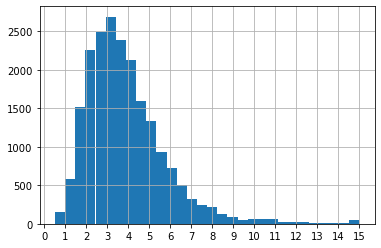

In [24]:
housing["median_income"].hist(bins=30)
plt.xticks(range(0,16,1))

In [25]:
housing["median_income"].mean()

3.8706710029070246

In [26]:
housing["median_income"].std()

1.8998217179452732

Looking at the histogram, we can see that most median_income values fall between 1 and 6 and there are fewer values that are greater than 6. Since we do not wish to have too many income categories, we choose to set up our strata in this fashion:

Category | Income Level
---|---
1 | 0 - 1.5
2 | 1.5 - 3.0
3 | 3.0 - 4.5
4 | 4.5 - 6.0
5 | 6.0+


Let's create this new feature and add it to our existing 'housing' dataframe:

In [27]:
INCOME_CAT_BINS = [0, 1.5, 3.0, 4.5, 6., np.inf]
INCOME_CAT_LABELS = [1,2,3,4,5]
housing["income_cat"] = pd.cut(x=housing["median_income"],
                              bins=INCOME_CAT_BINS,
                              labels=INCOME_CAT_LABELS)

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Text(0.5, 0, '[1, 2, 3, 4, 5]')

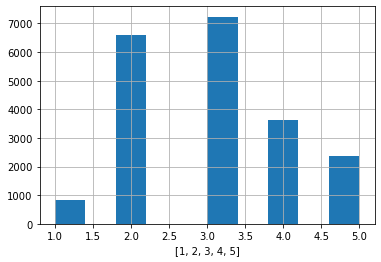

In [29]:
housing["income_cat"].hist()
plt.xlabel(INCOME_CAT_LABELS)

To do stratified sampling based on our new income category, we can use Scikit-Learn's 'StratifiedShuffleSplit' class as illustrated below:

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

data_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in data_split.split(X=housing, y=housing["income_cat"]):
    stratified_training_set = housing.loc[train_indices]
    stratified_test_set = housing.loc[test_indices]

In [31]:
train_indices.shape

(16512,)

In [32]:
test_indices.shape

(4128,)

In [33]:
stratified_training_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [34]:
stratified_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


To make sure this worked, we can compare the proportions of each income category between the training/testing sets and the overall data set

In [35]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [36]:
stratified_training_set["income_cat"].value_counts() / len(stratified_training_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [37]:
stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [38]:
x = housing["income_cat"].value_counts() / len(housing)
y = stratified_training_set["income_cat"].value_counts() / len(stratified_training_set)
z = stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)

my_dict = {"Overall":x, "Strat_Train":y, "Strat_Test":z}
pd.DataFrame(my_dict)

,Overall,Strat_Train,Strat_Test
3,0.350581,0.350594,0.350533
2,0.318847,0.318859,0.318798
4,0.176308,0.176296,0.176357
5,0.114438,0.114402,0.114583
1,0.039826,0.039850,0.039729


Indeed, the stratified training and test sets have pretty much the exact same proportions as the overall data set!

Thus, we are finally done with the splitting of our data, and we will use the stratified splits as our final training and test splits. 

The last thing we should do is some clean-up, namely removing the 'income_cat' column we created as it does not belong to the original data set:

In [39]:
stratified_training_set.drop(labels='income_cat', axis=1, inplace=True)
stratified_test_set.drop(labels='income_cat', axis=1, inplace=True)

In [40]:
stratified_training_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [41]:
stratified_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## ML Step 3 - Discover and Visualize the Data to Gain Insights

In [42]:
housing = stratified_training_set.copy()

Since we are dealing with geographical data, it seems like a good idea to plot this on map.

We can start with a simple plot of the data points based on location:

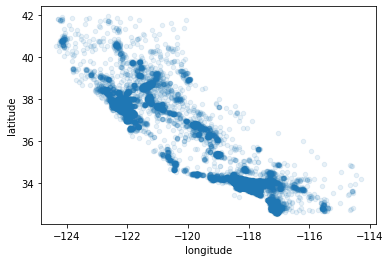

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Next, we can add a color scheme to depict the median_house_value data:

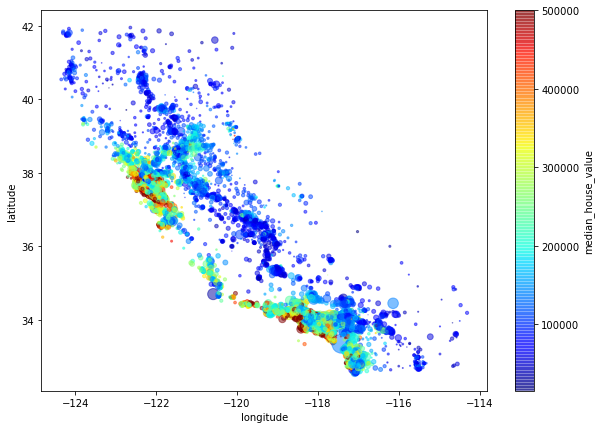

In [44]:
housing.plot(kind="scatter",
            x="longitude",
            y="latitude",
            alpha=0.5,
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            s=housing["population"]/100,
            figsize=(10,7),
            sharex=False)

Now, we can find a generic map of California and overlay the above plot onto it.

In [45]:
# Code to download a map of California

IMAGE_PATH = os.path.join(LOCAL_FOLDER_PATH, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"

print("Downloading", filename)

IMAGE_URL = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(IMAGE_URL, os.path.join(IMAGE_PATH, filename))

('datasets\\housing\\images\\california.png',
 <http.client.HTTPMessage at 0x1811cd299d0>)

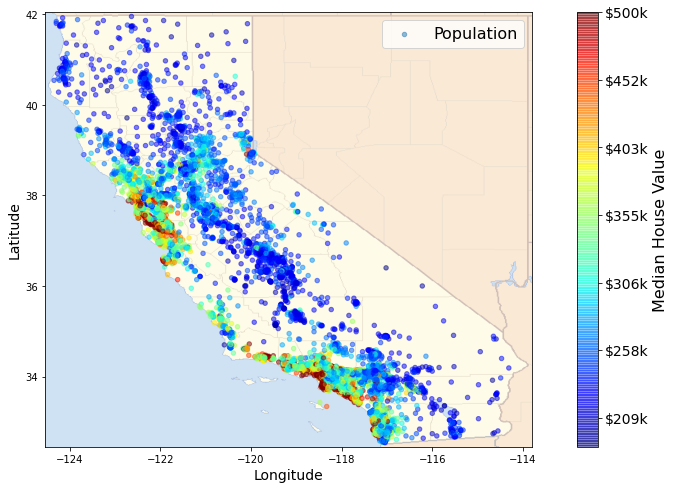

In [46]:
# Code to overlay scatter plot onto California map

import matplotlib.image as mpimg

california_map=mpimg.imread(os.path.join(IMAGE_PATH, filename))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(16,8),
                  label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.5,
                      )


plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

Looks good! We can see that there is a lot of high-value houses located near the ocean (which was expected). If we know more about the locale of various California cities, we could possibly infer more from this map.

Also, it may be a good idea to consider implementing a clustering algorithm simply to try and infer more from this map. Then you could create a feature that measures each district's distance to these clusters.

<do later> plot some X's to make major cities
    
    

**Now that we have visualized the data, we can start to investigate the data in a more numerical sense by looking at various descriptive statistics.**

The first thing we can do is look at the correlations amongst each feature. To do this, we can compute the so-called "standard correlation coefficient" (aka: "Pearson's r") between each pair of features.

In [47]:
housing_corr = housing.corr()
housing_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


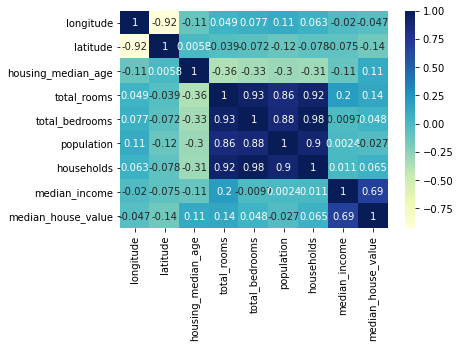

In [48]:
import seaborn as sns

sns.heatmap(housing_corr, cmap="YlGnBu", annot=True)

Let's focus on our target, the median_house_value:

In [49]:
housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Some things we can infer from these correlations:

* median_house_value is indeed most strongly correlated with median_income
* median_house_value is (very slightly) negatively correlated with population (meaning as the population of a district decreases, the house value increases, which makes sense)
* median_house_value is negatively correlated with latitude (meaning houses that are more to the North are less expensive) 

Another way to check for correlations amongst the features is using pandas 'scatter_matrix()' function, which creates all possible scatter plots amongst the input parameter features (or histograms).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001811CDB9490>,
      dtype=object)

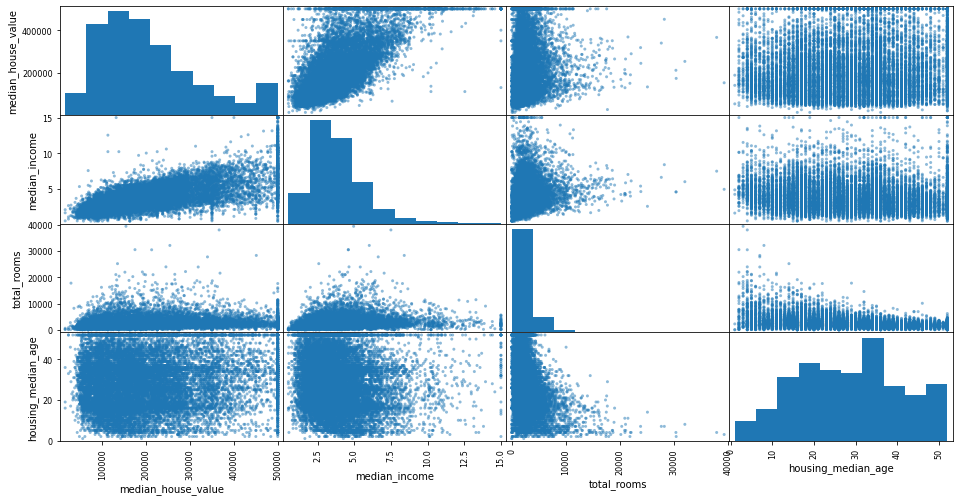

In [50]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value",
             "median_income",
             "total_rooms",
             "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(16,8))

Some observations:

* median_house_value appears to increase with median_income
* total_rooms doesn't seem to have a big affect on median_house_value
* housing_median_age also doesn't seem to have an affect
* older houses seem to have had fewer total_rooms
* median_house_value doesn't seem to be affected by the total_rooms

We should definitely look more into the relationship between median_income and median_house_value:

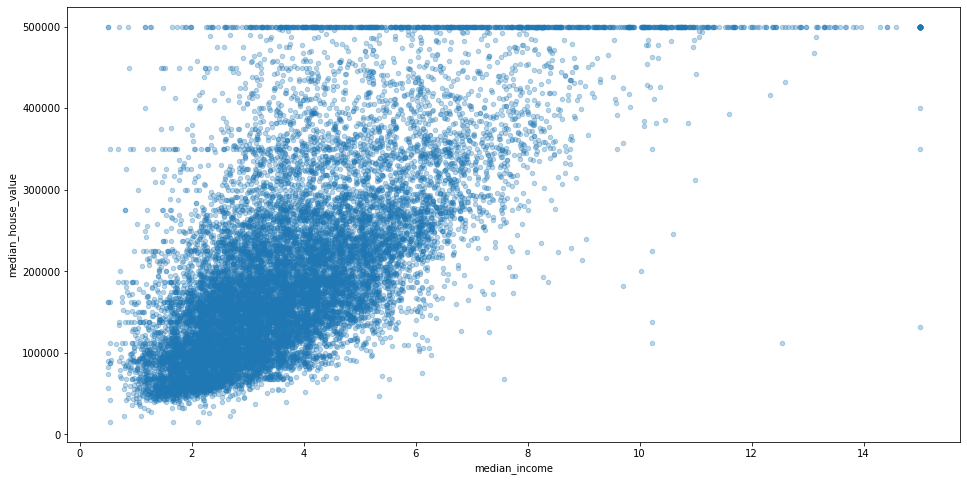

In [51]:
housing.plot(kind="scatter",
            x="median_income",
            y="median_house_value",
            alpha=0.3,
            figsize=(16,8))

Some observations:
* There is a very clear cap on the median_house_value at \\$500,000. This may be because of some housing law in California, or more likely the method of data collection just limited itself in this way
* There are also clear horizontal patterns of data points at ~\\$450,000 and ~\\$350,000. So, we can infer there are probably more at other values of median_hosue_value.
* There is a clear positive trend with these attributes

In particular, these horizontal patterns may skew our ML model, so could think about removing these districts (or a subset of) from our stratified training set to help the model avoid recreating this pattern.

One final thing we may wish to do is to explore **combinations** of attributes.

As an example, knowing the total number of rooms in an entire district is not very useful (or desirable!) knowledge. What would be more helpful is if we knew the average number of rooms **per house**.

As another example, looking at our California map above, we see there are clusters of districts. The data we have tells us the total population of these districts, but it may be helpful to know the **ratio** of total population to number of houses.

So, let's create some new features and see if we stumble upon any useful one.

In [52]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [53]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Some observations:
* We see that our new bedrooms_per_room feature has stronger (negative) correlation with the median_house_value! It appears that as the bedroom:total_room ratio increases, the median_house_value decreases (i.e. houses with more total rooms are more expensive)

## ML Step 4 - Prepare the Data for ML Algorithms

Now that we have done our exploratory data analysis (EDA) and have learned more about our data, we are ready to move on and prepare the data for the ML algorithm(s) we wish to train.

As is good practice with ML, we will write all our Python code into compact functions and classes. This is beneficial for many reasons:

1. Our same transformations can be repeated very quickly on any new/related data sets.
2. You can place all your transformations into their own Python module and reuse them easily.
3. You can use these transformations with streaming data.
4. Writing functions will make it easier for you to try multiple types of transformations on your data

To start, we will use our original stratified training set, as it has remained unmodified. We will also separate the predictor columns and the label column into their own dataframes (we may not wish to apply the same transformations to the predictors as to the labels).

In [55]:
housing = stratified_training_set.drop("median_house_value", axis=1)
housing_labels = stratified_training_set["median_house_value"].copy()

In [56]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [57]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

**Data Cleaning**

Before we train any ML algorithm, it is good to "clean" our data.

To start, we need to deal with any missing/null values in any attribute column. We have a few options we can do:

1. Remove any districts that contain a null value in any of its attributes.
2. Remove an entire attribute column (probably if the majority of values are null)
3. Interpolate the missing data

In the cell below, we can see that the 'total_bedroom' column has some null values, so we will deal with that.

In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [68]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [66]:
housing["total_bedrooms"].isnull().value_counts()

False    16354
True       158
Name: total_bedrooms, dtype: int64

Since there are only 16512-16354=158 null values (which account for only 158/16512 \*100% = 0.957% of the total data) it does not make sense to drop the entire 'total_bedrooms' column. On the other hand, we could drop these 158 districts (rows) and this probably would be okay given the percentage.

But, for illustration purposes, we will choose to interpolate the missing values.

We can replace each null value with various descriptive statistics, most commonly used are the mean and median, or we could simply set these null values to zero.

For our purposes, we choose to replace the null values with the median of the 'total_bedrooms' column. To do this, we can take advantage of Scikit-Learn's "SimpleImputer' class.

In [67]:
# Computing median to see what it is

median = housing["total_bedrooms"].median()
median

433.0

In [69]:
from sklearn.impute import SimpleImputer

imputer_instance = SimpleImputer(strategy='median')

# We must drop all categorical attributes, as it is not possible to compute a 'median' for them!
housing_numerical = housing.drop("ocean_proximity", axis=1)

imputer_instance.fit(housing_numerical)

SimpleImputer(strategy='median')

The imputer object (when fit) only computes the median of each numerical attribute and stores the values in the variable 'statistics_'. As expected, it has computed 433 for the median.

In [71]:
imputer_instance.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Finally, now that the imputer instance has been "trained", we apply it to our training data, and it will transform the data set by replacing the null values with the (respective) median values.

_Note: As we discovered, only the 'total_bedrooms' attribute has missing data, but it is good practice to apply the imputer to all numerical attributes._

In [73]:
X = imputer_instance.transform(housing_numerical)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

To see that it worked, we can convert this out NumPy array into a Pandas dataframe and check for null values:

In [78]:
X_df = pd.DataFrame(data=X,
                   columns=housing_numerical.columns,
                   index=housing_numerical.index)

X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


**Handling Text and Categorical Attributes**

Now let's see how to deal with text/categorical attributes, of which we only have one: 'ocean_proximity' (which is more accurately a 'categorical' attribute, as it only has a limited number of possible values - 'text' attributes are those that can have any arbitrary text values)

In [97]:
housing_categorical = housing[["ocean_proximity"]]
housing_categorical.head(15)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [90]:
housing_categorical["ocean_proximity"].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

Since any ML algorithm can only handle numerical values, we need to somehow convert this categorical column into one (or multiple) numerical columns.

One obvious way to do this is to create a new attribute column representing the five categories, and fill each value with a distinct integer depending on what category the corresponding district falls into.

To easily accomplish this, we can use Scikit-Learn's 'OrdinalEncoder' class, as shown below:

In [91]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder_instance = OrdinalEncoder()

housing_categorial_encoded = ordinal_encoder_instance.fit_transform(housing_categorical)

In [95]:
type(housing_categorial_encoded)

numpy.ndarray

In [98]:
housing_categorial_encoded[:15]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

You can see how the encodings of each category using the 'categories_' variable. They have been encoded as 0,1,2,... in the order they are listed in the array.

In [100]:
ordinal_encoder_instance.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

So, we can see that '<1H OCEAN' was encoded as a 0, 'INLAND' as a 1, 'ISLAND' as a 2, etc.

Unfortunately, there is a (potential) problem with this type of encoding: ML algorithms make the assumption that two numerical values that are close together are somehow similar than if they were further apart.

Of course, this is not a problem if we are perhaps talking about numerical distances, or even ordered categories such as "bad", "average", "good", "excellent". But, this is not the case for use, as '<1H OCEAN' is encoded as 0 and 'NEAR OCEAN' is encoded as 4 - these encodings are numerically far apart but the categories certainly represent regions that are close together!

To fix such an issue, another way we can encode a categorical attribute is doing what is called 'one-hot encoding'.

This is where we actually make _five_ new attribute columns, one for each category. Then, depending on which category a district will fall into, we assign a 1 (hot) in that respective column category and 0's (cold) in the other columns categories. These new attribute columns are called "dummy variables".

As usual, Scikit-Learn has a useful class called 'OneHotEncoder' we can use:

In [101]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder_instance = OneHotEncoder()

housing_categorical_onehot = onehot_encoder_instance.fit_transform(housing_categorical)

In [102]:
housing_categorical_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

_Note: The output is a SciPy 'sparse matrix' and not a regular NumPy array. Since we know that most of the values will be zero, it is a waste of memory to store them. A sparse matrix only stores the location of the non-zero elements in memory. You can (essentially) manipulate as a regular array. See the documentation for more details._

In [107]:
# Just to view the sparse matrix output

housing_categorical_onehot.toarray()[:15]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [108]:
# Can also see the categories from one-hot encoding

onehot_encoder_instance.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Custom Transformers**

We have used many classes from the Scikit-Learn library which have greatly simplified our code. But there will be cases where you would probably need to write your own custom transformation functions. In these cases, we should make sure that your custom transformations work seamlessly with the Scikit-Learn library. 

To ensure this, you simply need to create a class and implement the following three methods:
1. fit() (which would return self)
2. transform()
3. fit_transform()

You can get the third one simply by inheriting from the 'TransformerMixin' class. If you also inherit from the 'BaseEstimator' class (and you'll need to discard \*args and \*\*kwargs in your class constructor) then you'll also get two extra methods, which are useful for automatic hyperparameter tuning:
* get_params()
* set_params()

As an illustration, here is a transformer class that adds the combined attributes we discussed above:

**Feature Scaling**